In [2]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = '.\data'

In [3]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [4]:
data_arr = np.array(data)
label_arr = np.array(label)

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [7]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [8]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

Epoch 1/64
108/108 [==============================] - 450s 4s/step - loss: 1.4845 - accuracy: 0.3267 - val_loss: 1.3367 - val_accuracy: 0.4606
Epoch 2/64
108/108 [==============================] - 449s 4s/step - loss: 1.3458 - accuracy: 0.4193 - val_loss: 1.2482 - val_accuracy: 0.4954
Epoch 3/64
108/108 [==============================] - 470s 4s/step - loss: 1.2641 - accuracy: 0.4726 - val_loss: 1.1187 - val_accuracy: 0.5394
Epoch 4/64
108/108 [==============================] - 537s 5s/step - loss: 1.2134 - accuracy: 0.5071 - val_loss: 1.0883 - val_accuracy: 0.5845
Epoch 5/64
108/108 [==============================] - 570s 5s/step - loss: 1.1613 - accuracy: 0.5387 - val_loss: 1.0639 - val_accuracy: 0.5949
Epoch 6/64
108/108 [==============================] - 443s 4s/step - loss: 1.1368 - accuracy: 0.5421 - val_loss: 1.0411 - val_accuracy: 0.6042
Epoch 7/64
108/108 [==============================] - 446s 4s/step - loss: 1.0993 - accuracy: 0.5734 - val_loss: 0.9747 - val_accuracy: 0.6181

Epoch 58/64
108/108 [==============================] - 190s 2s/step - loss: 0.6598 - accuracy: 0.7588 - val_loss: 0.7863 - val_accuracy: 0.7488
Epoch 59/64
108/108 [==============================] - 190s 2s/step - loss: 0.6345 - accuracy: 0.7651 - val_loss: 0.6328 - val_accuracy: 0.7627
Epoch 60/64
108/108 [==============================] - 190s 2s/step - loss: 0.6457 - accuracy: 0.7533 - val_loss: 0.7139 - val_accuracy: 0.7442
Epoch 61/64
108/108 [==============================] - 191s 2s/step - loss: 0.6521 - accuracy: 0.7591 - val_loss: 0.6642 - val_accuracy: 0.7639
Epoch 62/64
108/108 [==============================] - 189s 2s/step - loss: 0.6403 - accuracy: 0.7648 - val_loss: 0.5870 - val_accuracy: 0.7963
Epoch 63/64
108/108 [==============================] - 194s 2s/step - loss: 0.6265 - accuracy: 0.7750 - val_loss: 0.6170 - val_accuracy: 0.7859
Epoch 64/64
108/108 [==============================] - 195s 2s/step - loss: 0.6393 - accuracy: 0.7628 - val_loss: 0.7875 - val_accuracy:

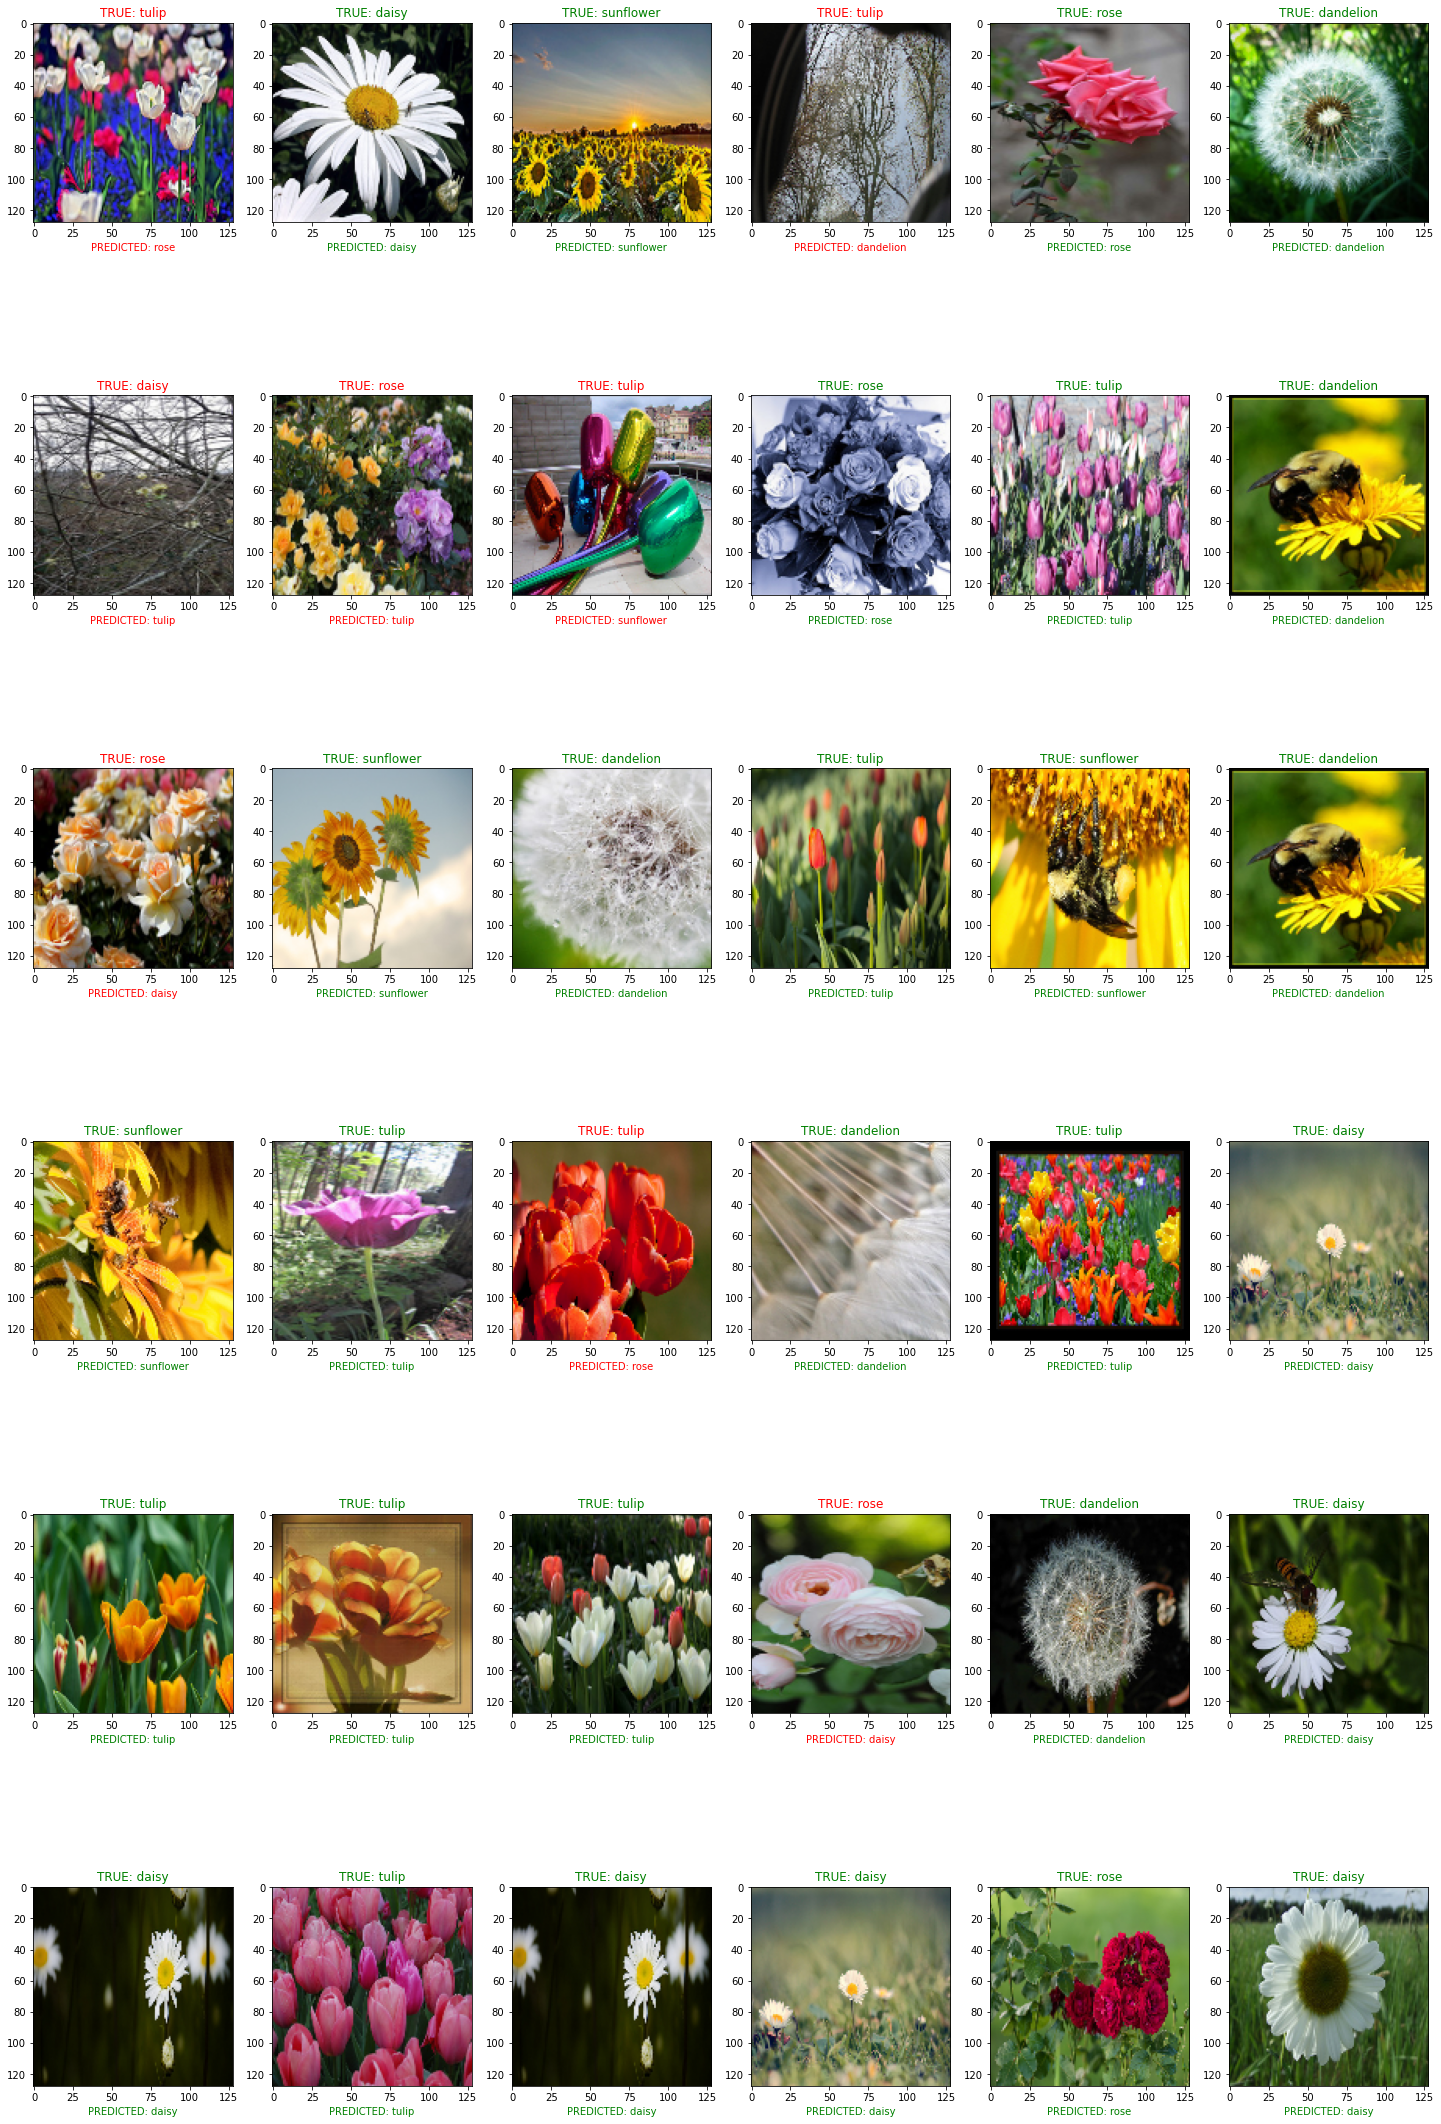

In [10]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [15]:
model.save("flower_recognition.h5")


In [27]:
from tkinter import *  #tkinter v8.6
from tkinter import ttk,filedialog
from tkinter.filedialog import askopenfile

root = Tk()

root.geometry("750x500")

file_path=""
def file_loc():
    global file_path
    file = filedialog.askopenfile(mode='r', filetypes=[('image Files', '*.jpeg *.png *.jpg'),('Text Files','*.txt'),('Python Files','*.py')])
    if file:
      file_path = os.path.abspath(file.name)
def recognize():
    image = cv2.imread(file_path)

    SIZE=128

    # Check if the image was loaded successfully
    if image is not None:
        # Resize the image to the model's input size
        image = cv2.resize(image, (SIZE, SIZE))

        # Normalize pixel values (assuming values are in [0, 255])
        image = image / 255.0

        # Reshape to match the model's input shape
        image = image.reshape(1, SIZE, SIZE, 3)

        predictions = model.predict(image)

        # Interpret the predictions
        predicted_class = np.argmax(predictions)

        # Map the class label to a category
        predicted_category = categories[predicted_class]

        # Use the result as needed
        print("Predicted Category:", predicted_category)
        label = Label(root, text=predicted_category)
        label.pack()
    else:
        print("Error: Image not loaded successfully.")
label2=Label(root, text="Select Image")
label2.pack()
button = Button(root, text="Select File", command=file_loc) 
button.pack()
label3=Label(root, text="Click Run")
label3.pack()
button1=Button(root, text="Run", command=recognize)
button1.pack()
root.mainloop()
        

Predicted Category: rose
